In [11]:
import torch
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import numpy as np
import pickle

from dynamic_reparameterization.DynamicReparameterizationNet import DynamicReparameterizationNet

In [12]:
with open('data/duffing/duffing_dataset.pickle', 'rb') as f:
    train_data = pickle.load(f)

with open('data/duffing/duffing_dataset_test.pickle', 'rb') as f:
    test_data = pickle.load(f)

In [13]:
t_train = torch.linspace(0, train_data.DT * len(train_data.x), len(train_data.y))
t_test = torch.linspace(0, test_data.DT * len(test_data.x), len(test_data.y))

train_loader = DataLoader(train_data, batch_size=100, shuffle=True)
test_loader = DataLoader(test_data, shuffle=True)

In [23]:
model = DynamicReparameterizationNet([3, 64, 64, 64, 2], H=0.001, sparsity=0.9, Np=100, fractional_tolerence=0.1, verbose=False)

In [24]:
model.train_n_epochs(train_loader=train_loader, n_epochs=500, lr=0.01, weight_decay=0.001, epochs_reallocate=25)
model.train_n_epochs(train_loader=train_loader, n_epochs=500, lr=0.001, weight_decay=0.001, epochs_reallocate=100)
model.train_n_epochs(train_loader=train_loader, n_epochs=500, lr=0.0001, weight_decay=0.001, epochs_reallocate=250)
model.train_n_epochs(train_loader=train_loader, n_epochs=1000, lr=0.0001, weight_decay=0.001, epochs_reallocate=0)

Epoch 0: 0.787652313709259
Sparsity: 0.9002584591507912 

Epoch 100: 2926.9443359375
Sparsity: 0.8896851539611816 

Epoch 200: 7260.978515625
Sparsity: 0.8769971802830696 

Epoch 300: 45436.16796875
Sparsity: 0.8685385286808014 

Epoch 400: 307596.96875
Sparsity: 0.8636043220758438 

Epoch 0: 359596.40625
Sparsity: 0.860549807548523 

Epoch 100: 0.4697692394256592
Sparsity: 0.860549807548523 

Epoch 200: 4807.08544921875
Sparsity: 0.8598449230194092 

Epoch 300: 58698.94921875
Sparsity: 0.8591400384902954 

Epoch 400: 91595.8046875
Sparsity: 0.8584351539611816 

Epoch 0: 94511.6796875
Sparsity: 0.8577302694320679 

Epoch 100: 0.6056792140007019
Sparsity: 0.8577302694320679 

Epoch 200: 0.17375491559505463
Sparsity: 0.8577302694320679 

Epoch 300: 351.3426208496094
Sparsity: 0.862077072262764 

Epoch 400: 437.1871032714844
Sparsity: 0.862077072262764 

Epoch 0: 67.5101318359375
Sparsity: 0.862077072262764 

Epoch 100: 0.32015079259872437
Sparsity: 0.862077072262764 

Epoch 200: 0.189230

In [25]:
y_pred = model(test_data.x).detach().numpy()

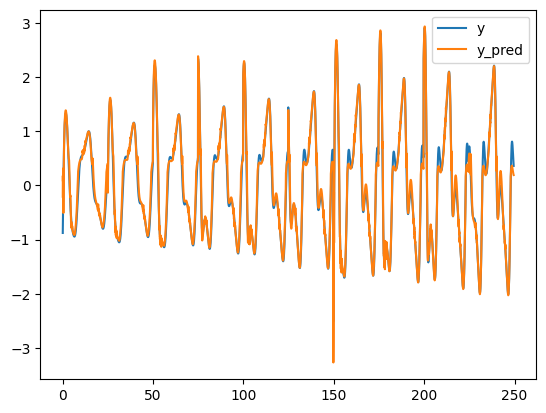

In [26]:
# plot y and y_pred
plt.plot(t_test, test_data.y[:, 0], label="y")
plt.plot(t_test, y_pred[:, 0], label="y_pred")
plt.legend()
plt.show()

In [22]:
model.get_layerwise_sparsity()

[tensor(1.), tensor(1.), tensor(0.8989), tensor(1.)]